In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import the countries data from the csv file with an index column of countries
df_cubesat = pd.read_csv("Feb13_Feb28_CubeSat_Data.csv")
#timestamp column to datetime 
df_cubesat['timestamp'] = pd.to_datetime(df_cubesat['timestamp'])
df_cubesat = df_cubesat.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_cubesat.head()


C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2208184341.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_cubesat = df_cubesat.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2208184341.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cubesat = df_cubesat.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,2326,1614,2411
2024-02-13 18:00:00,3557,2497,3680
2024-02-13 19:00:00,3440,2452,3604
2024-02-13 20:00:00,3541,2489,3684
2024-02-13 21:00:00,3466,2486,3689


In [4]:
# #calculate the percent change from the hourly counts from the mean of the hour
# df_cubesat['percent_change'] = df_cubesat['Chan_0_1'].pct_change()
# df_cubesat['percent_change'] = df_cubesat['percent_change'].fillna(0)
# df_cubesat.head()

#calculate the percent change from the hourly counts by each channel from the mean 
chan_0_1_mean = df_cubesat['Chan_0_1'].mean()
chan_0_2_mean = df_cubesat['Chan_0_2'].mean()
chan_1_2_mean = df_cubesat['Chan_1_2'].mean()

df_cubesat['percent_change_0_1'] = (df_cubesat['Chan_0_1']) / chan_0_1_mean
df_cubesat['percent_change_0_2'] = (df_cubesat['Chan_0_2']) / chan_0_2_mean
df_cubesat['percent_change_1_2'] = (df_cubesat['Chan_1_2']) / chan_1_2_mean

df_cubesat['percent_sum'] = df_cubesat['percent_change_0_1'] + df_cubesat['percent_change_0_2'] + df_cubesat['percent_change_1_2']
df_cubesat.head()


# df_cubesat['percent_change_0_1'] = df_cubesat['Chan_0_1'].pct_change()
# df_cubesat['percent_change_0_1'] = df_cubesat['percent_change_0_1'].fillna(0)
# df_cubesat['percent_change_0_2'] = df_cubesat['Chan_0_2'].pct_change()
# df_cubesat['percent_change_0_2'] = df_cubesat['percent_change_0_2'].fillna(0)
# df_cubesat['percent_change_1_2'] = df_cubesat['Chan_1_2'].pct_change()
# df_cubesat['percent_change_1_2'] = df_cubesat['percent_change_1_2'].fillna(0)

# df_cubesat['percent_sum'] = df_cubesat['percent_change_0_1'] + df_cubesat['percent_change_0_2'] + df_cubesat['percent_change_1_2']
# df_cubesat.head()

,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum
timestamp,,,,,,,
2024-02-13 17:00:00,2326,1614,2411,0.637523,0.641009,0.639622,1.918155
2024-02-13 18:00:00,3557,2497,3680,0.974923,0.991697,0.976280,2.942900
2024-02-13 19:00:00,3440,2452,3604,0.942855,0.973825,0.956117,2.872798
2024-02-13 20:00:00,3541,2489,3684,0.970538,0.988520,0.977341,2.936398
2024-02-13 21:00:00,3466,2486,3689,0.949981,0.987329,0.978667,2.915977


In [5]:
#drop the first and last hour of data from the cubesat data
df_cubesat = df_cubesat.iloc[1:]
df_cubesat = df_cubesat.iloc[:-1]
df_cubesat.head()

# #find the percentage value of the data
# df_cubesat['Chan_0_1'] = df_cubesat['Chan_0_1'] * 100
# df_cubesat.head()

,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum
timestamp,,,,,,,
2024-02-13 18:00:00,3557,2497,3680,0.974923,0.991697,0.976280,2.942900
2024-02-13 19:00:00,3440,2452,3604,0.942855,0.973825,0.956117,2.872798
2024-02-13 20:00:00,3541,2489,3684,0.970538,0.988520,0.977341,2.936398
2024-02-13 21:00:00,3466,2486,3689,0.949981,0.987329,0.978667,2.915977
2024-02-13 22:00:00,3459,2399,3630,0.948063,0.952776,0.963015,2.863854


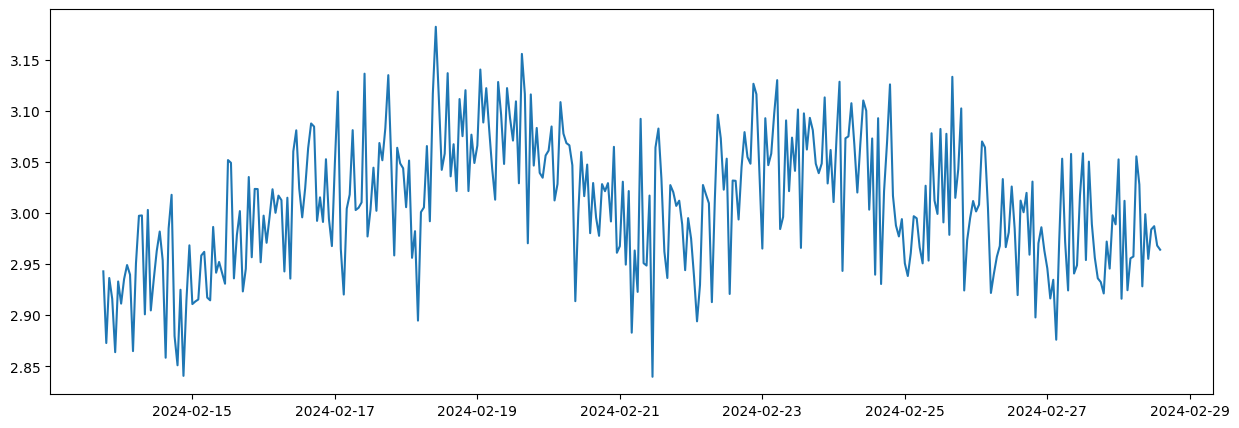

In [6]:
#plot Chan_0_1
plt.figure(figsize=(15, 5))
plt.plot(df_cubesat['percent_sum'])

In [7]:
df_weather = pd.read_csv("AW_Feb7_Feb28.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined = pd.concat([df_cubesat, df_weather], axis=1, join='outer')
df_combined.dropna(inplace=True)
df_combined.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\3555736659.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather = df_weather.resample('H').sum()


,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum,Outdoor_Temperature,Wind_Speed,Wind_Gust,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 18:00:00,3557.0,2497.0,3680.0,0.974923,0.991697,0.976280,2.942900,608.0,25.8,32.7,...,0.0,37.32,44.64,930.12,360.0,503,0,24.4,348.40,12
2024-02-13 19:00:00,3440.0,2452.0,3604.0,0.942855,0.973825,0.956117,2.872798,586.7,14.9,18.8,...,0.0,37.32,44.64,930.12,360.3,564,0,0.0,348.70,12
2024-02-13 20:00:00,3541.0,2489.0,3684.0,0.970538,0.988520,0.977341,2.936398,567.9,4.0,6.7,...,0.0,37.32,44.64,930.12,360.5,606,0,0.0,348.87,12
2024-02-13 21:00:00,3466.0,2486.0,3689.0,0.949981,0.987329,0.978667,2.915977,543.0,7.1,11.0,...,0.0,37.32,44.64,930.12,360.6,664,0,0.0,349.01,12
2024-02-13 22:00:00,3459.0,2399.0,3630.0,0.948063,0.952776,0.963015,2.863854,531.7,18.0,23.3,...,0.0,37.32,44.64,930.12,360.6,707,0,0.0,348.99,12


In [8]:
#scale temperature by the percent change
temperature_mean = df_combined['Outdoor_Temperature'].mean()
df_combined['Outdoor_Temperature'] = df_combined['Outdoor_Temperature'] / temperature_mean
#df_combined['Outdoor_Temperature'] = df_combined['Outdoor_Temperature'] *0.1

#scale relative pressure the same way 
pressure_mean = df_combined['Relative_Pressure_(inHg)'].mean()
df_combined['Relative_Pressure_(inHg)'] = df_combined['Relative_Pressure_(inHg)'] / pressure_mean
#df_combined['Relative_Pressure_(inHg)'] = df_combined['Relative_Pressure_(inHg)'] * 2
df_combined.head()


# #scale relative pressure to a percent value
# df_combined['Relative_Pressure_(inHg)'] = df_combined['Relative_Pressure_(inHg)'] / 100
# df_combined.head()

# #scale pressure by ratio of absolute against relative
# df_combined['Relative_Pressure_(inHg)'] = df_combined['Absolute_Pressure_(inHg)'] / df_combined['Relative_Pressure_(inHg)']
# df_combined.head()

,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum,Outdoor_Temperature,Wind_Speed,Wind_Gust,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 18:00:00,3557.0,2497.0,3680.0,0.974923,0.991697,0.976280,2.942900,0.964103,25.8,32.7,...,0.0,37.32,44.64,930.12,1.001471,503,0,24.4,348.40,12
2024-02-13 19:00:00,3440.0,2452.0,3604.0,0.942855,0.973825,0.956117,2.872798,0.930328,14.9,18.8,...,0.0,37.32,44.64,930.12,1.002306,564,0,0.0,348.70,12
2024-02-13 20:00:00,3541.0,2489.0,3684.0,0.970538,0.988520,0.977341,2.936398,0.900516,4.0,6.7,...,0.0,37.32,44.64,930.12,1.002862,606,0,0.0,348.87,12
2024-02-13 21:00:00,3466.0,2486.0,3689.0,0.949981,0.987329,0.978667,2.915977,0.861033,7.1,11.0,...,0.0,37.32,44.64,930.12,1.003140,664,0,0.0,349.01,12
2024-02-13 22:00:00,3459.0,2399.0,3630.0,0.948063,0.952776,0.963015,2.863854,0.843114,18.0,23.3,...,0.0,37.32,44.64,930.12,1.003140,707,0,0.0,348.99,12


<>:22: SyntaxWarning: invalid escape sequence '\%'
<>:22: SyntaxWarning: invalid escape sequence '\%'
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\4012882796.py:22: SyntaxWarning: invalid escape sequence '\%'
  ax1.legend(['Relative Pressure', 'Hourly Counts \%'], loc='upper left')


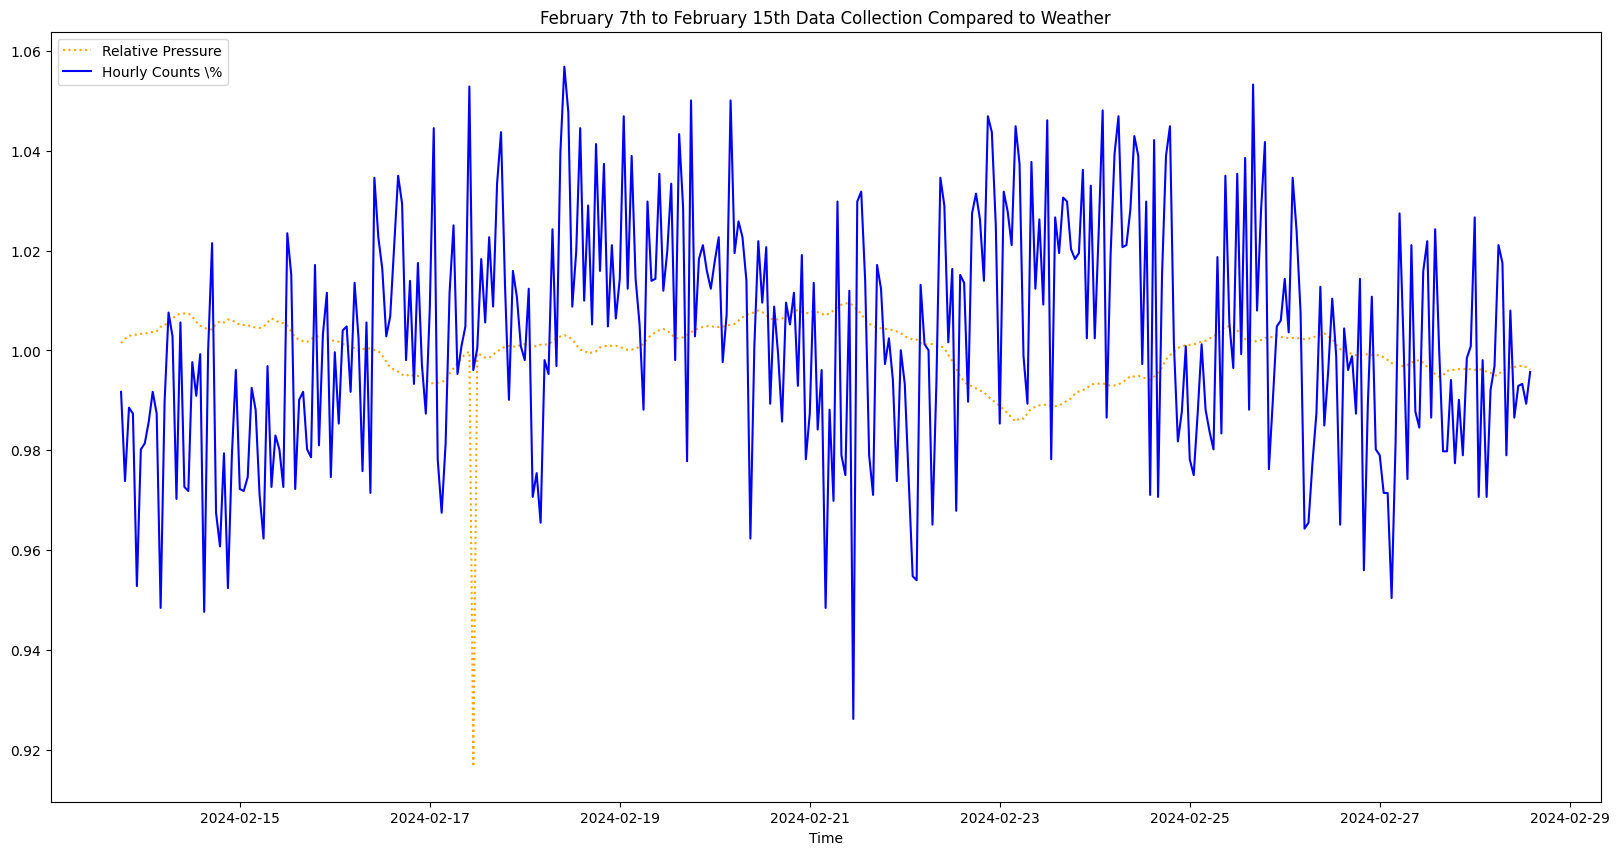

In [9]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#x1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['percent_change_0_2'], color='blue')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 15th Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Hourly Counts \%'], loc='upper left')


In [10]:
#import the countries data from the csv file with an index column of countries
df_ground= pd.read_csv("Rm415SA-Pi3crm001-E5-Oct5_2024_02_13_to_02_28.csv")
#timestamp column to datetime 
df_ground['timestamp'] = pd.to_datetime(df_ground['timestamp'])
df_ground = df_ground.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_cubesat.resample('H', on ='timestamp', axis=0).mean()

df_ground.head()


C:\Users\torip\AppData\Local\Temp\ipykernel_1728\733104239.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_ground = df_ground.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\733104239.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ground = df_ground.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,6623,3224,6645
2024-02-13 18:00:00,10123,5018,10413
2024-02-13 19:00:00,10164,4949,10333
2024-02-13 20:00:00,9959,4899,10226
2024-02-13 21:00:00,10415,5109,10413


In [11]:
#ratio the sum of chan_0_1 and chan_0_2 and chan_1_2 to find one singular line
# df_combined['Chan_0_1'] = df_combined['Chan_0_1'] / df_combined['Chan_0_2']
# df_combined['Chan_1_2'] = df_combined['Chan_1_2'] / df_combined['Chan_0_2']
# df_combined = df_combined.drop(columns=['Chan_0_2'])
# df_combined.head()

# #ratio all channel datas together to find one singular line
# df_ground['Chan_0_1'] = df_ground['Chan_0_1'] / df_ground['Chan_0_2']
# df_ground['Chan_0_1'] = df_ground['Chan_0_1'] / df_ground['Chan_1_2']
# df_ground = df_ground.drop(columns=['Chan_0_2'])
# df_ground = df_ground.drop(columns=['Chan_1_2'])
# df_ground.head()

# #ratio the channels by taking the sum of all three and then dividing each channel by the sum
# df_ground['Chan_0_1'] = df_ground['Chan_0_1'] / (df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2'])
# df_ground['Chan_0_2'] = df_ground['Chan_0_2'] / (df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2'])
# df_ground['Chan_1_2'] = df_ground['Chan_1_2'] / (df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2'])
# #sum the channels to one value
# df_ground['Chan_0_1'] = df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2']
# #drop the individual channels
# df_ground = df_ground.drop(columns=['Chan_0_2'])
# df_ground = df_ground.drop(columns=['Chan_1_2'])
# df_ground.head()

# df_ground['percent_change_0_1'] = df_ground['Chan_0_1'].pct_change()
# df_ground['percent_change_0_1'] = df_ground['percent_change_0_1'].fillna(0)
# df_ground['percent_change_0_2'] = df_ground['Chan_0_2'].pct_change()
# df_ground['percent_change_0_2'] = df_ground['percent_change_0_2'].fillna(0)
# df_ground['percent_change_1_2'] = df_ground['Chan_1_2'].pct_change()
# df_ground['percent_change_1_2'] = df_ground['percent_change_1_2'].fillna(0)

# df_ground['percent_sum'] = df_ground['percent_change_0_1'] + df_ground['percent_change_0_2'] + df_ground['percent_change_1_2']
# df_ground.head()

#calculate the percent change from the hourly counts by each channel from the mean 
chan_0_1_mean = df_ground['Chan_0_1'].mean()
chan_0_2_mean = df_ground['Chan_0_2'].mean()
chan_1_2_mean = df_ground['Chan_1_2'].mean()

df_ground['percent_change_0_1'] = (df_ground['Chan_0_1']) / chan_0_1_mean
df_ground['percent_change_0_2'] = (df_ground['Chan_0_2']) / chan_0_2_mean
df_ground['percent_change_1_2'] = (df_ground['Chan_1_2']) / chan_1_2_mean

df_ground['percent_sum'] = df_ground['percent_change_0_1'] + df_ground['percent_change_0_2'] + df_ground['percent_change_1_2']
df_ground.head()


,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum
timestamp,,,,,,,
2024-02-13 17:00:00,6623,3224,6645,0.632599,0.627688,0.630755,1.891043
2024-02-13 18:00:00,10123,5018,10413,0.966903,0.976966,0.988421,2.932290
2024-02-13 19:00:00,10164,4949,10333,0.970820,0.963532,0.980827,2.915179
2024-02-13 20:00:00,9959,4899,10226,0.951239,0.953798,0.970670,2.875707
2024-02-13 21:00:00,10415,5109,10413,0.994794,0.994683,0.988421,2.977898


In [12]:
#drop the first and last hour of data from the cubesat data
df_ground = df_ground.iloc[1:]
df_ground = df_ground.iloc[:-1]
#drop the second to hour
df_ground = df_ground.iloc[1:]

df_ground.head()

,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum
timestamp,,,,,,,
2024-02-13 19:00:00,10164,4949,10333,0.970820,0.963532,0.980827,2.915179
2024-02-13 20:00:00,9959,4899,10226,0.951239,0.953798,0.970670,2.875707
2024-02-13 21:00:00,10415,5109,10413,0.994794,0.994683,0.988421,2.977898
2024-02-13 22:00:00,9965,4866,10058,0.951812,0.947373,0.954723,2.853908
2024-02-13 23:00:00,10291,4982,10496,0.982950,0.969957,0.996299,2.949206


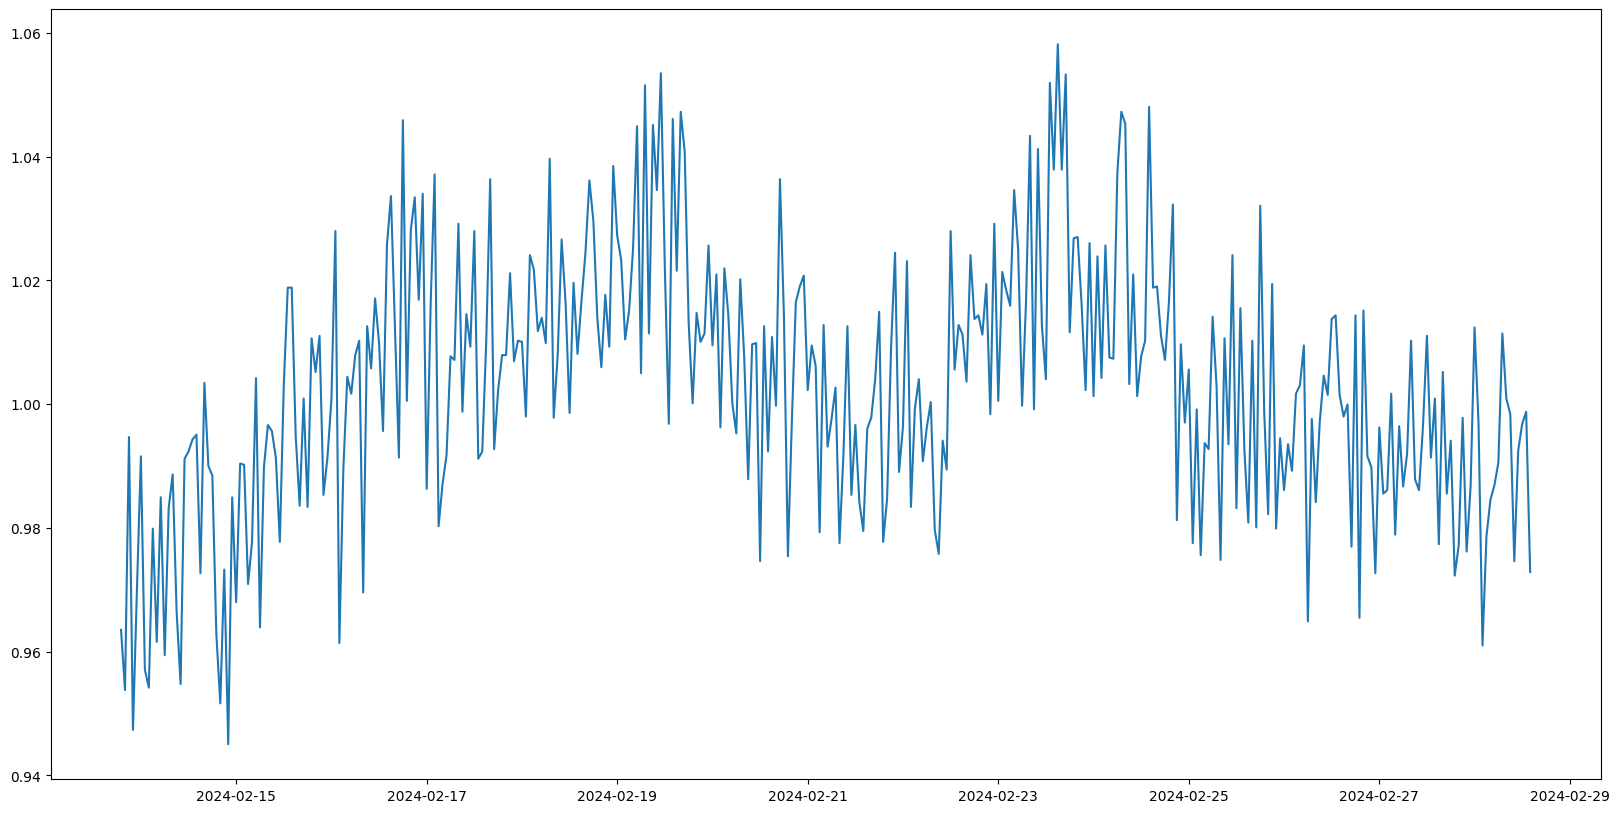

In [13]:
#plot Chan_0_1 on a figure of size (20,15)
plt.figure(figsize=(20, 10))
plt.plot(df_ground['percent_change_0_2'])

In [14]:
df_weather = pd.read_csv("AW_Feb7_Feb28.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined2 = pd.concat([df_ground, df_weather], axis=1, join='outer')
df_combined2.dropna(inplace=True)
df_combined2.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\1919948967.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather = df_weather.resample('H').sum()


,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum,Outdoor_Temperature,Wind_Speed,Wind_Gust,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 19:00:00,10164.0,4949.0,10333.0,0.970820,0.963532,0.980827,2.915179,586.7,14.9,18.8,...,0.0,37.32,44.64,930.12,360.30,564,0,0.0,348.70,12
2024-02-13 20:00:00,9959.0,4899.0,10226.0,0.951239,0.953798,0.970670,2.875707,567.9,4.0,6.7,...,0.0,37.32,44.64,930.12,360.50,606,0,0.0,348.87,12
2024-02-13 21:00:00,10415.0,5109.0,10413.0,0.994794,0.994683,0.988421,2.977898,543.0,7.1,11.0,...,0.0,37.32,44.64,930.12,360.60,664,0,0.0,349.01,12
2024-02-13 22:00:00,9965.0,4866.0,10058.0,0.951812,0.947373,0.954723,2.853908,531.7,18.0,23.3,...,0.0,37.32,44.64,930.12,360.60,707,0,0.0,348.99,12
2024-02-13 23:00:00,10291.0,4982.0,10496.0,0.982950,0.969957,0.996299,2.949206,518.6,20.8,27.9,...,0.0,37.32,44.64,930.12,360.66,760,0,0.0,349.08,12


In [15]:
#scale temperature by the percent change
temperature_mean = df_combined2['Outdoor_Temperature'].mean()
df_combined2['Outdoor_Temperature'] = df_combined2['Outdoor_Temperature'] / temperature_mean
#df_combined['Outdoor_Temperature'] = df_combined['Outdoor_Temperature'] *0.1

#scale relative pressure the same way 
pressure_mean = df_combined2['Relative_Pressure_(inHg)'].mean()
df_combined2['Relative_Pressure_(inHg)'] = df_combined2['Relative_Pressure_(inHg)'] / pressure_mean
#df_combined['Relative_Pressure_(inHg)'] = df_combined['Relative_Pressure_(inHg)'] * 2
df_combined2.head()

,Chan_0_1,Chan_0_2,Chan_1_2,percent_change_0_1,percent_change_0_2,percent_change_1_2,percent_sum,Outdoor_Temperature,Wind_Speed,Wind_Gust,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 19:00:00,10164.0,4949.0,10333.0,0.970820,0.963532,0.980827,2.915179,0.930234,14.9,18.8,...,0.0,37.32,44.64,930.12,1.002310,564,0,0.0,348.70,12
2024-02-13 20:00:00,9959.0,4899.0,10226.0,0.951239,0.953798,0.970670,2.875707,0.900426,4.0,6.7,...,0.0,37.32,44.64,930.12,1.002866,606,0,0.0,348.87,12
2024-02-13 21:00:00,10415.0,5109.0,10413.0,0.994794,0.994683,0.988421,2.977898,0.860946,7.1,11.0,...,0.0,37.32,44.64,930.12,1.003144,664,0,0.0,349.01,12
2024-02-13 22:00:00,9965.0,4866.0,10058.0,0.951812,0.947373,0.954723,2.853908,0.843029,18.0,23.3,...,0.0,37.32,44.64,930.12,1.003144,707,0,0.0,348.99,12
2024-02-13 23:00:00,10291.0,4982.0,10496.0,0.982950,0.969957,0.996299,2.949206,0.822259,20.8,27.9,...,0.0,37.32,44.64,930.12,1.003311,760,0,0.0,349.08,12


<>:22: SyntaxWarning: invalid escape sequence '\%'
<>:22: SyntaxWarning: invalid escape sequence '\%'
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2298626146.py:22: SyntaxWarning: invalid escape sequence '\%'
  ax1.legend(['Relative Pressure', 'Hourly Counts \%'], loc='upper left')


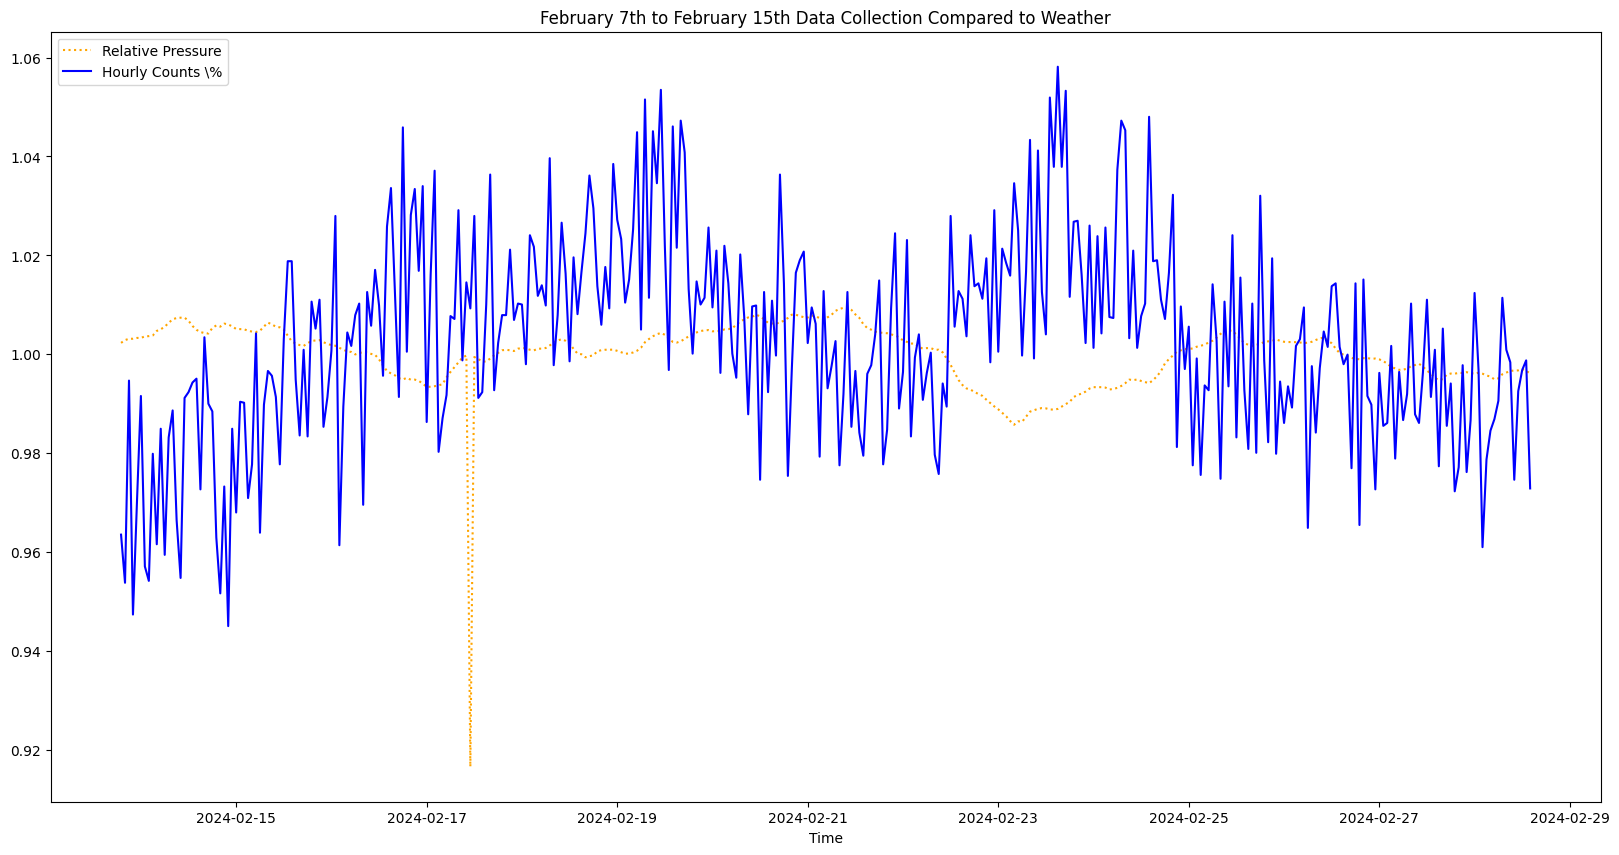

In [16]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#x1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined2.index, df_combined2['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined2.index, df_combined2['percent_change_0_2'], color='blue')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 15th Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Hourly Counts \%'], loc='upper left')


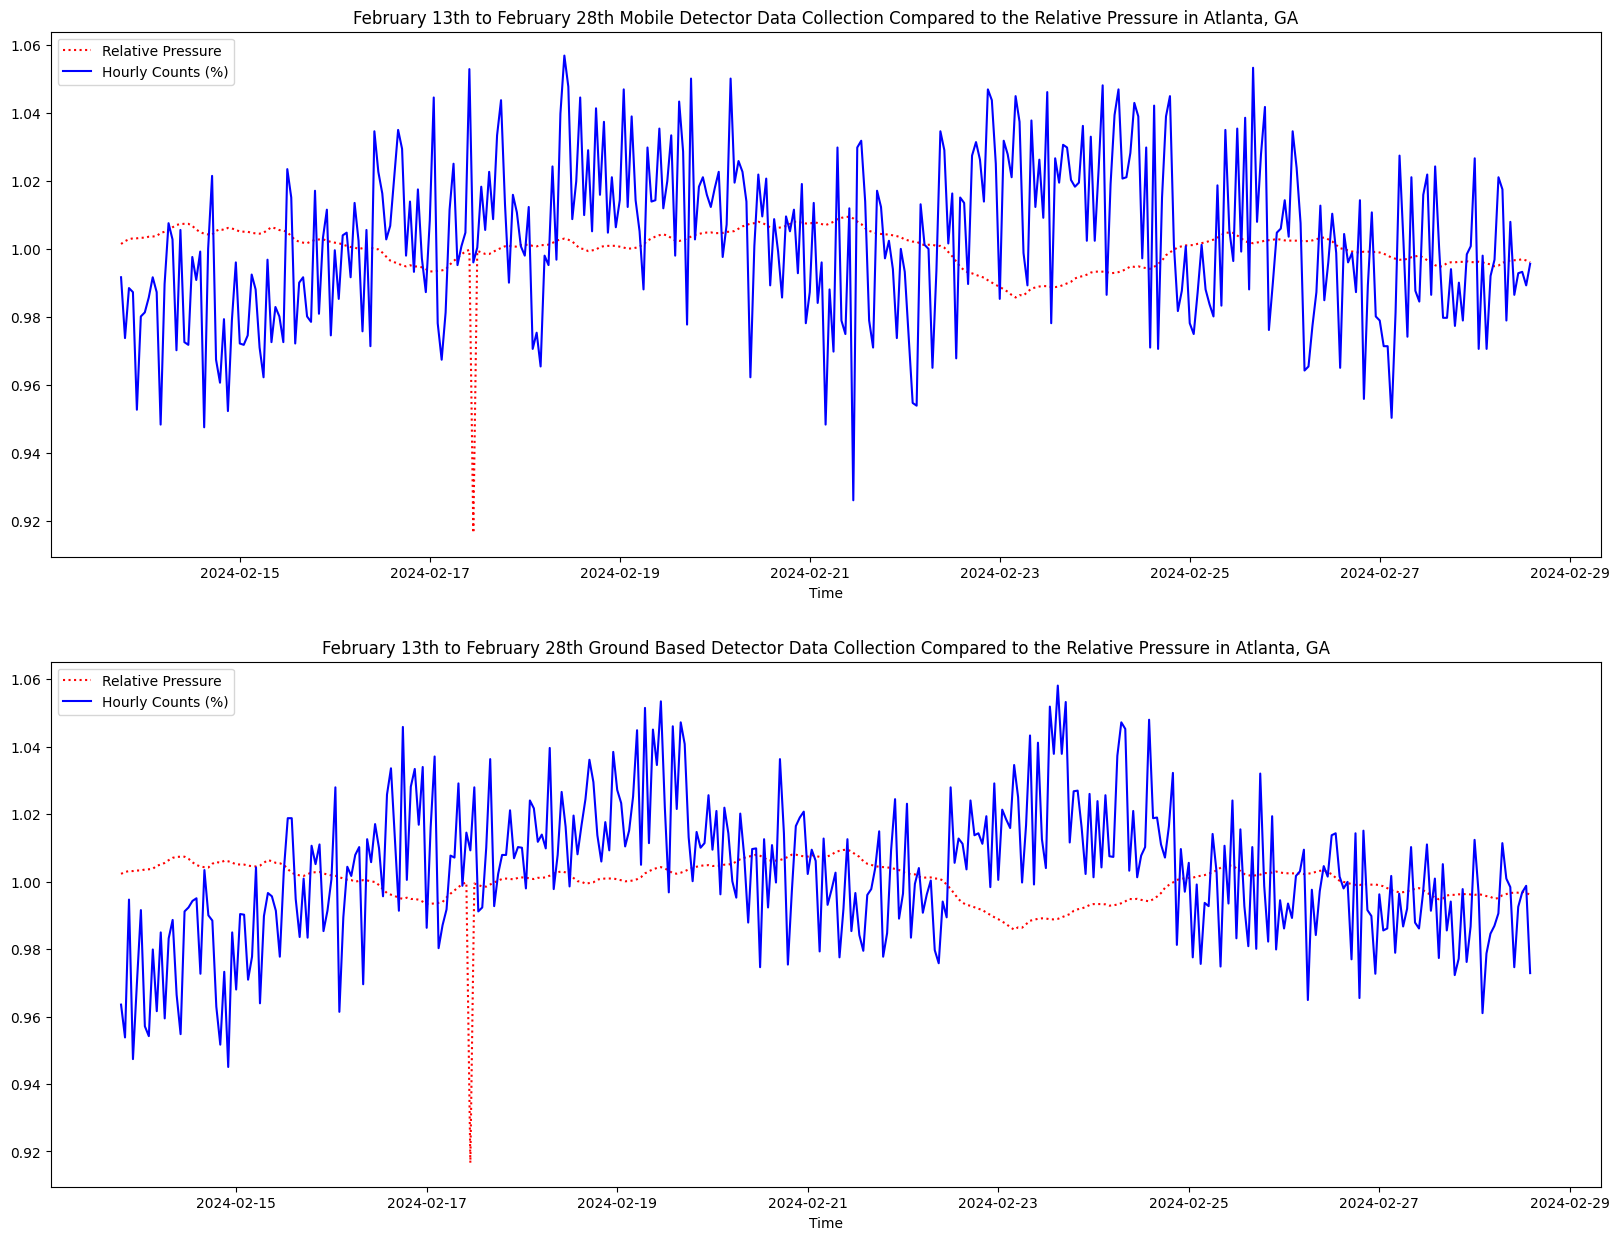

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='red',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['percent_change_0_2'], color='blue')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 13th to February 28th Mobile Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax1.legend(['Relative Pressure', 'Hourly Counts (%)'], loc='upper left')

ax2.set_xlabel('Time')
#plot temperature on the third axis
#x1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax2.plot(df_combined2.index, df_combined2['Relative_Pressure_(inHg)'], color='red',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax2.plot(df_combined2.index, df_combined2['percent_change_0_2'], color='blue')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax2.set_title('February 13th to February 28th Ground Based Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax2.legend(['Relative Pressure', 'Hourly Counts (%)'], loc='upper left')

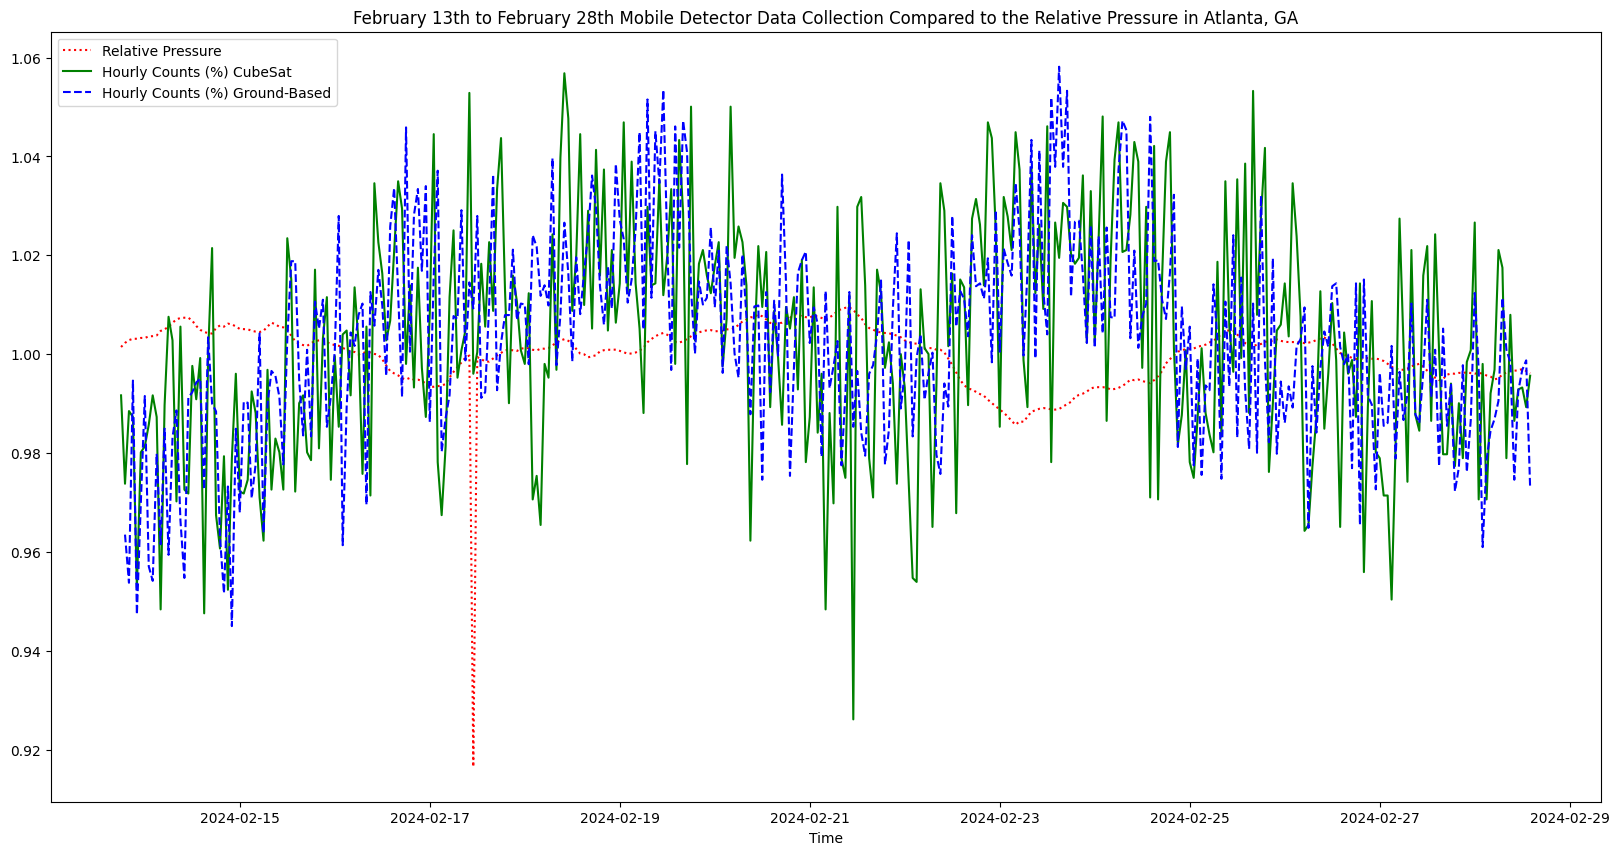

In [18]:
#set figures
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.set_xlabel('Time')
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='red',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['percent_change_0_2'], color='green')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined2.index, df_combined2['percent_change_0_2'], color='blue', linestyle='dashed')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 13th to February 28th Mobile Detector Data Collection Compared to the Relative Pressure in Atlanta, GA')
#set the legend
ax1.legend(['Relative Pressure', 'Hourly Counts (%) CubeSat', 'Hourly Counts (%) Ground-Based'], loc='upper left')

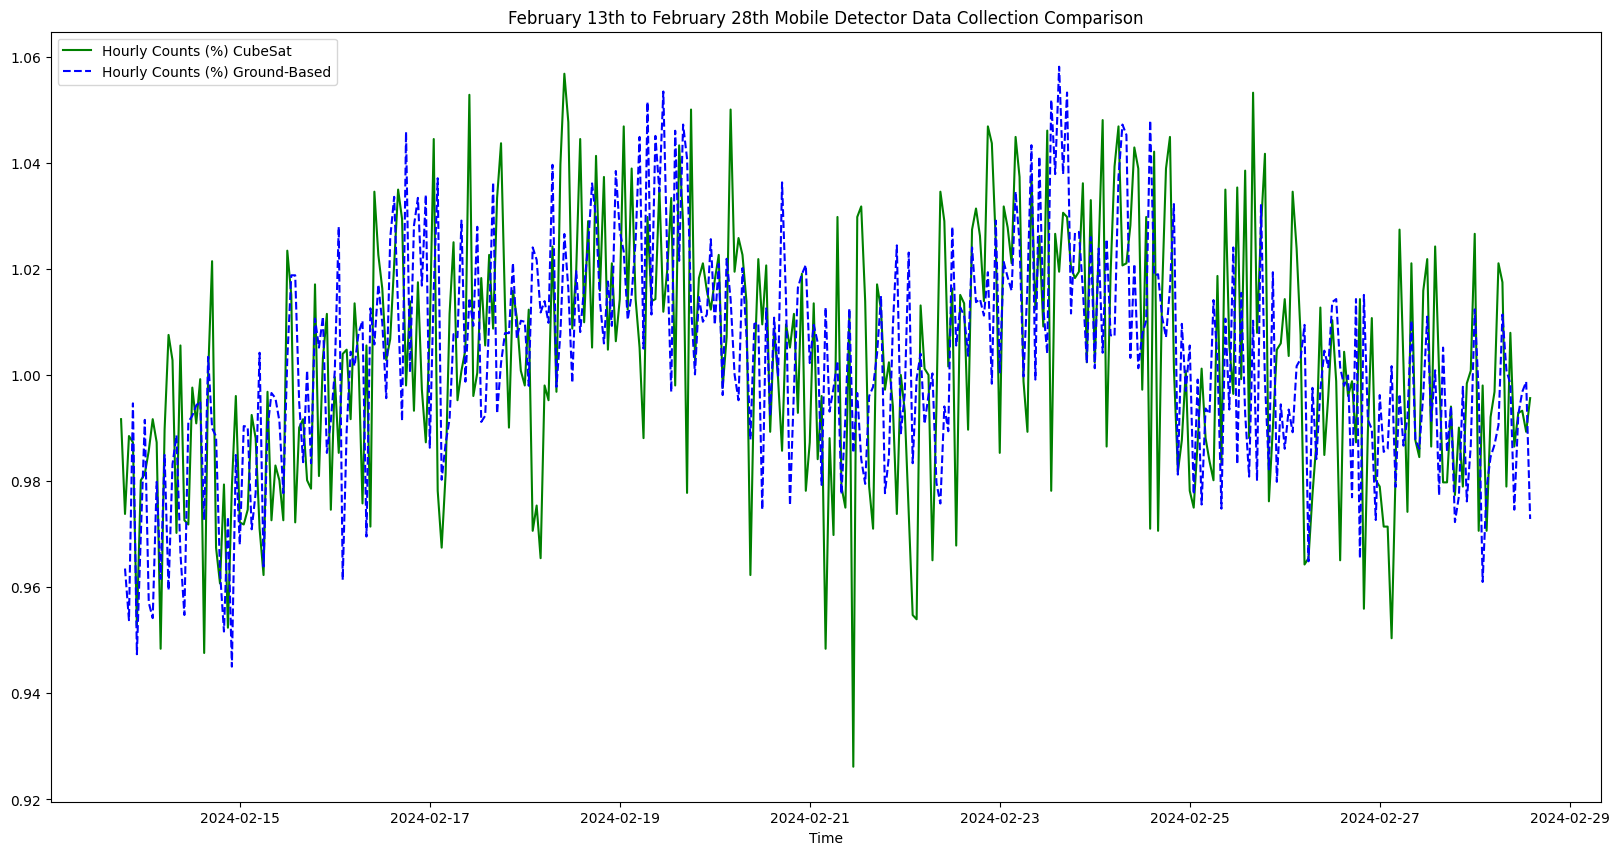

In [19]:
#set figures
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.set_xlabel('Time')
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='red',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['percent_change_0_2'], color='green')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined2.index, df_combined2['percent_change_0_2'], color='blue', linestyle='dashed')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 13th to February 28th Mobile Detector Data Collection Comparison')
#set the legend
ax1.legend(['Hourly Counts (%) CubeSat', 'Hourly Counts (%) Ground-Based'], loc='upper left')

USING SCRIPT PARTS SHARED

In [20]:
#import the countries data from the csv file with an index column of countries
df_cubesat_updated = pd.read_csv("Feb13_Feb28_CubeSat_Data.csv")
#timestamp column to datetime 
df_cubesat_updated['timestamp'] = pd.to_datetime(df_cubesat_updated['timestamp'])
df_cubesat_updated = df_cubesat_updated.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_cubesat_updated.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2900869229.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_cubesat_updated = df_cubesat_updated.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2900869229.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cubesat_updated = df_cubesat_updated.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,2326,1614,2411
2024-02-13 18:00:00,3557,2497,3680
2024-02-13 19:00:00,3440,2452,3604
2024-02-13 20:00:00,3541,2489,3684
2024-02-13 21:00:00,3466,2486,3689


In [21]:
df_cubesat_updated["Chan_0_1_pct"] = ((df_cubesat_updated['Chan_0_1'] - df_cubesat_updated['Chan_0_1'].mean())/ 
                      df_cubesat_updated['Chan_0_1'].mean()*100)
df_cubesat_updated["Chan_0_2_pct"] = ((df_cubesat_updated['Chan_0_2'] - df_cubesat_updated['Chan_0_2'].mean())/ 
                      df_cubesat_updated['Chan_0_2'].mean()*100)
df_cubesat_updated["Chan_1_2_pct"] = ((df_cubesat_updated['Chan_1_2'] - df_cubesat_updated['Chan_1_2'].mean())/ 
                      df_cubesat_updated['Chan_1_2'].mean()*100)
df_cubesat_updated["Chan_0_1_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_1_pct.mean()
df_cubesat_updated["Chan_0_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_2_pct.mean()
df_cubesat_updated["Chan_1_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_1_2_pct.mean()

df_cubesat_updated.head()

#remove first and last line of data
df_cubesat_updated = df_cubesat_updated.iloc[1:]
df_cubesat_updated = df_cubesat_updated.iloc[:-1]

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2425819686.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cubesat_updated["Chan_0_1_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_1_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2425819686.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cubesat_updated["Chan_0_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_2_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2425819686.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_cubesat_updated["Chan_1_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_1_2_pct.mean()


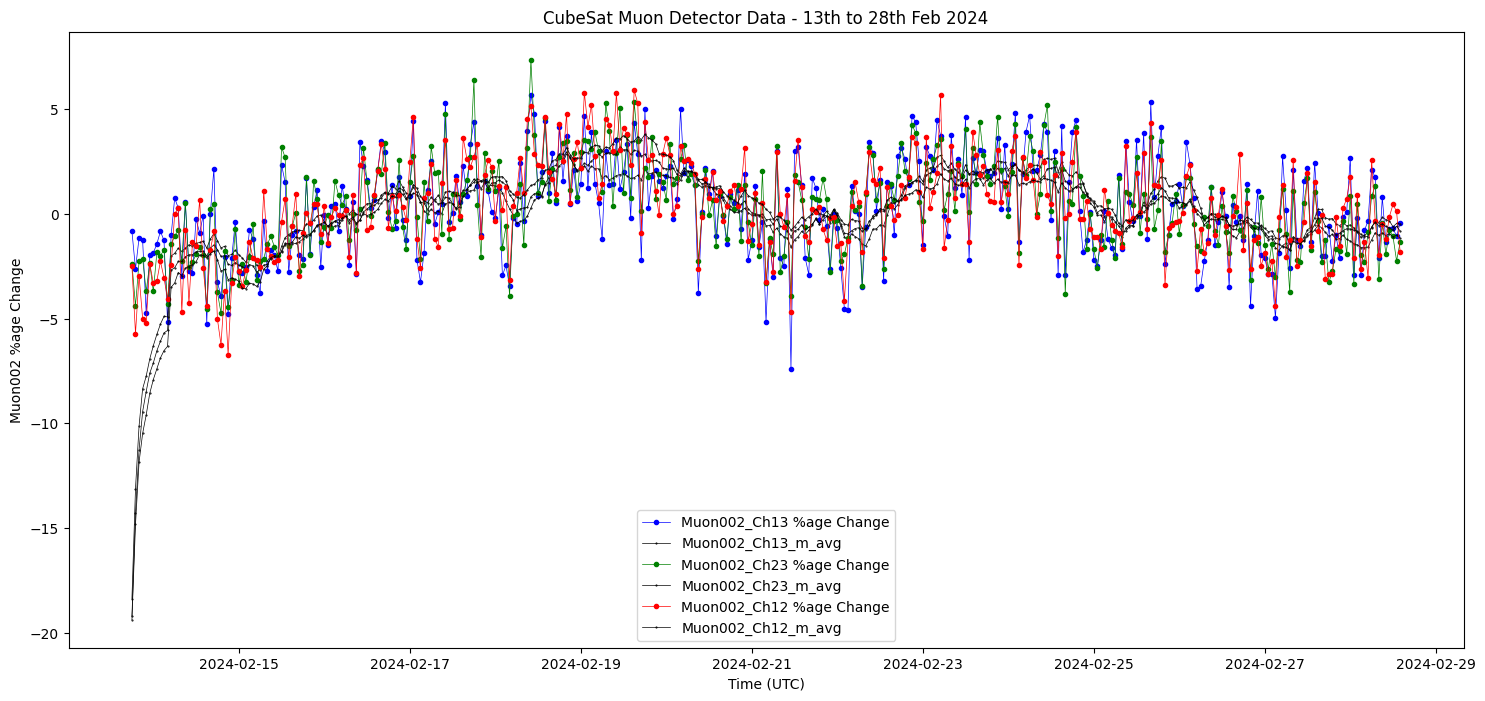

In [22]:
plt.rcParams["axes.grid"] = False
fig, (ax5) = plt.subplots(1,figsize=(18, 8))

ax5.plot(df_cubesat_updated["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13 %age Change')
ax5.plot(df_cubesat_updated["Chan_0_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax5.plot(df_cubesat_updated["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23 %age Change')
ax5.plot(df_cubesat_updated["Chan_1_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax5.plot(df_cubesat_updated["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12 %age Change')
ax5.plot(df_cubesat_updated["Chan_0_1_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')
ax5.set_ylabel('Muon002 %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('CubeSat Muon Detector Data - 13th to 28th Feb 2024')
ax5.legend(loc='lower center')


Updated Ground Code

In [23]:
#import the countries data from the csv file with an index column of countries
df_ground_updated = pd.read_csv("Feb13_Feb28_CubeSat_Data.csv")
#timestamp column to datetime 
df_ground_updated['timestamp'] = pd.to_datetime(df_ground_updated['timestamp'])
df_ground_updated = df_ground_updated.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_ground_updated.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\3236987323.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_ground_updated = df_ground_updated.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\3236987323.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ground_updated = df_ground_updated.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,2326,1614,2411
2024-02-13 18:00:00,3557,2497,3680
2024-02-13 19:00:00,3440,2452,3604
2024-02-13 20:00:00,3541,2489,3684
2024-02-13 21:00:00,3466,2486,3689


In [24]:
df_ground_updated["Chan_0_1_pct"] = ((df_ground_updated['Chan_0_1'] - df_ground_updated['Chan_0_1'].mean())/ 
                      df_ground_updated['Chan_0_1'].mean()*100)
df_ground_updated["Chan_0_2_pct"] = ((df_ground_updated['Chan_0_2'] - df_ground_updated['Chan_0_2'].mean())/ 
                      df_ground_updated['Chan_0_2'].mean()*100)
df_ground_updated["Chan_1_2_pct"] = ((df_ground_updated['Chan_1_2'] - df_ground_updated['Chan_1_2'].mean())/ 
                      df_ground_updated['Chan_1_2'].mean()*100)
df_ground_updated["Chan_0_1_m_avg"] = df_ground_updated.rolling('12H').Chan_0_1_pct.mean()
df_ground_updated["Chan_0_2_m_avg"] = df_ground_updated.rolling('12H').Chan_0_2_pct.mean()
df_ground_updated["Chan_1_2_m_avg"] = df_ground_updated.rolling('12H').Chan_1_2_pct.mean()

df_ground_updated.head()

#filter out first and last lines of data
df_ground_updated = df_ground_updated.iloc[1:]
df_ground_updated = df_ground_updated.iloc[:-1]

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\1995659117.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ground_updated["Chan_0_1_m_avg"] = df_ground_updated.rolling('12H').Chan_0_1_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\1995659117.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ground_updated["Chan_0_2_m_avg"] = df_ground_updated.rolling('12H').Chan_0_2_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_1728\1995659117.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ground_updated["Chan_1_2_m_avg"] = df_ground_updated.rolling('12H').Chan_1_2_pct.mean()


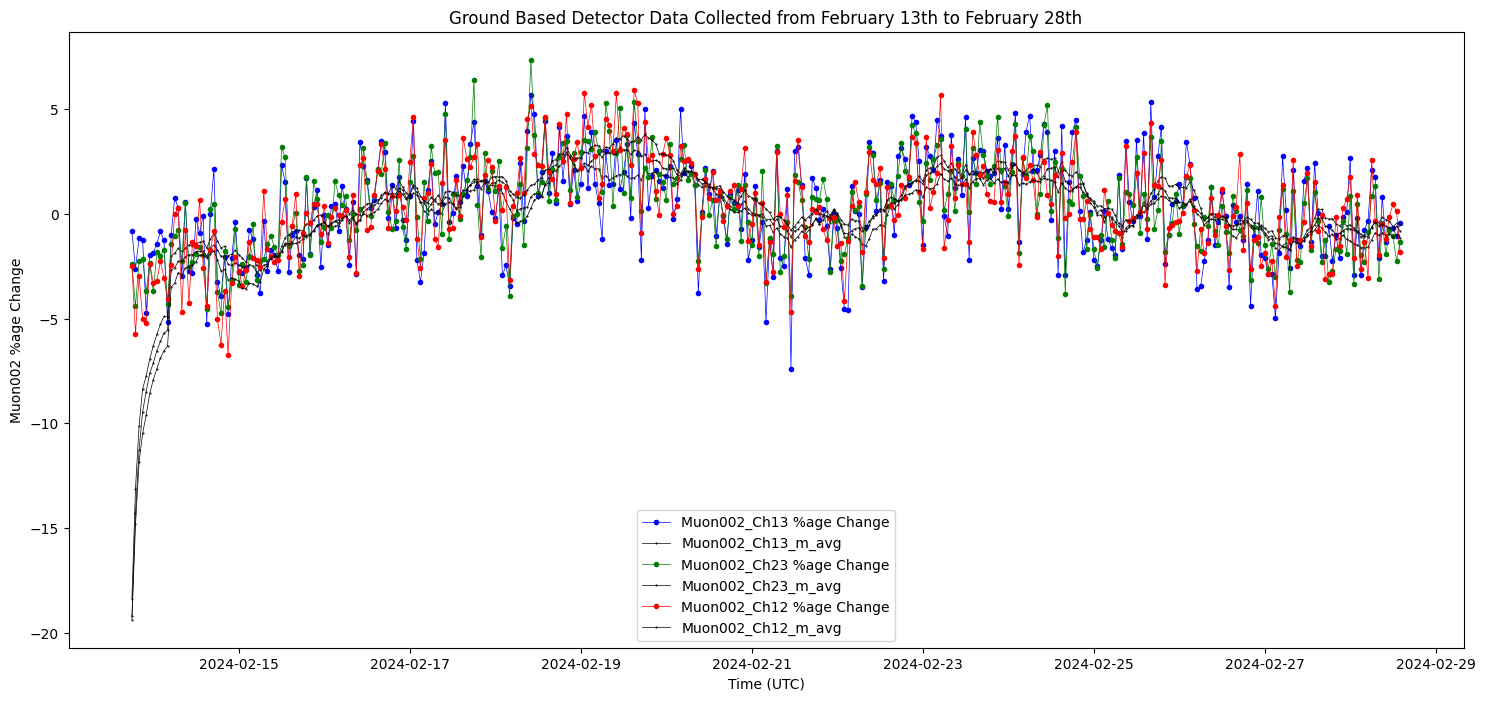

In [25]:
plt.rcParams["axes.grid"] = False
fig, (ax5) = plt.subplots(1,figsize=(18, 8))

ax5.plot(df_ground_updated["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13 %age Change')
ax5.plot(df_ground_updated["Chan_0_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax5.plot(df_ground_updated["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23 %age Change')
ax5.plot(df_ground_updated["Chan_1_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax5.plot(df_ground_updated["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12 %age Change')
ax5.plot(df_ground_updated["Chan_0_1_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')
ax5.set_ylabel('Muon002 %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('Ground Based Detector Data Collected from February 13th to February 28th')
ax5.legend(loc='lower center')


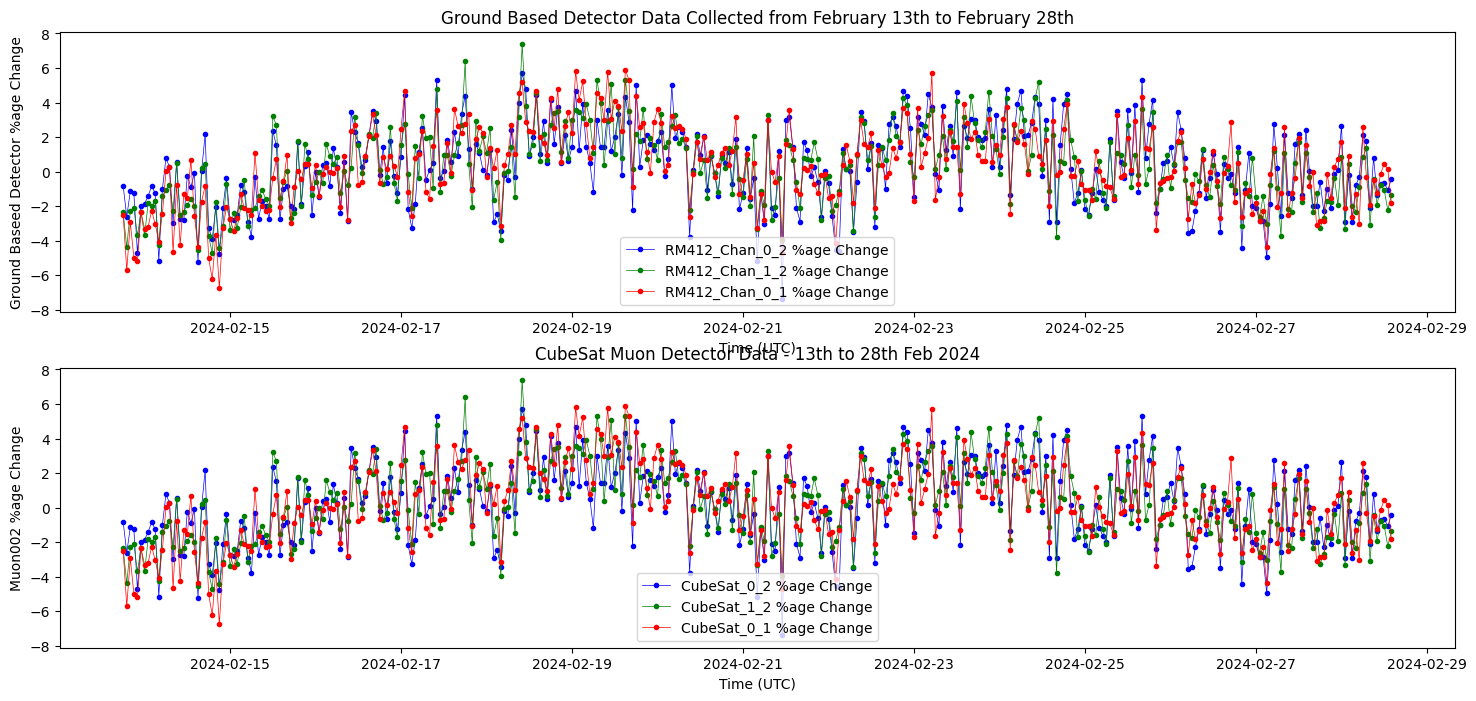

In [26]:
plt.rcParams["axes.grid"] = False
fig, (ax5, ax6) = plt.subplots(2,figsize=(18, 8))

ax5.plot(df_ground_updated["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='RM412_Chan_0_2 %age Change')
#ax5.plot(df_ground_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax5.plot(df_ground_updated["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='RM412_Chan_1_2 %age Change')
#ax5.plot(df_ground_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax5.plot(df_ground_updated["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='RM412_Chan_0_1 %age Change')
#ax5.plot(df_ground_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')
ax5.set_ylabel('Ground Baseed Detector %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('Ground Based Detector Data Collected from February 13th to February 28th')
ax5.legend(loc='lower center')

ax6.plot(df_cubesat_updated["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='CubeSat_0_2 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax6.plot(df_cubesat_updated["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_cubesat_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax6.plot(df_cubesat_updated["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')
ax6.set_ylabel('Muon002 %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Muon Detector Data - 13th to 28th Feb 2024')
ax6.legend(loc='lower center')

add in pressure scaling 

In [56]:
df_weather = pd.read_csv("AW_Feb7_Feb28.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined3 = pd.concat([df_cubesat_updated, df_weather], axis=1, join='outer')
df_combined3.dropna(inplace=True)
df_combined3.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_1728\2951954257.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather = df_weather.resample('H').sum()


,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Outdoor_Temperature,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 18:00:00,3557.0,2497.0,3680.0,-2.507694,-0.830265,-2.372048,-19.377673,-18.364682,-19.204911,608.0,...,0.0,37.32,44.64,930.12,360.0,503,0,24.4,348.40,12
2024-02-13 19:00:00,3440.0,2452.0,3604.0,-5.714497,-2.617465,-4.388277,-14.823281,-13.115610,-14.266033,586.7,...,0.0,37.32,44.64,930.12,360.3,564,0,0.0,348.70,12
2024-02-13 20:00:00,3541.0,2489.0,3684.0,-2.946231,-1.147990,-2.265930,-11.854018,-10.123705,-11.266007,567.9,...,0.0,37.32,44.64,930.12,360.5,606,0,0.0,348.87,12
2024-02-13 21:00:00,3466.0,2486.0,3689.0,-5.001874,-1.267136,-2.133284,-10.483590,-8.352391,-9.439462,543.0,...,0.0,37.32,44.64,930.12,360.6,664,0,0.0,349.01,12
2024-02-13 22:00:00,3459.0,2399.0,3630.0,-5.193734,-4.722389,-3.698514,-9.601947,-7.747391,-8.482638,531.7,...,0.0,37.32,44.64,930.12,360.6,707,0,0.0,348.99,12


In [57]:
#scale temperature by the percent change
temperature_mean = df_combined3['Outdoor_Temperature'].mean()
df_combined3['Outdoor_Temperature'] = df_combined3['Outdoor_Temperature'] / temperature_mean
#df_combined['Outdoor_Temperature'] = df_combined['Outdoor_Temperature'] *0.1

#scale relative pressure the same way 
#pressure_mean = df_combined3['Relative_Pressure_(inHg)'].sum()
df_combined3['Relative_Pressure_pct'] = ((df_combined3['Relative_Pressure_(inHg)'] - df_combined3['Relative_Pressure_(inHg)'].mean())/ 
                      df_combined3['Relative_Pressure_(inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'] * 2

#filter any Relative_Pressure_pct values that are less than -10 and replace them with average
#df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'].mask(df_combined3['Relative_Pressure_pct'] < -10, df_combined3['Relative_Pressure_pct'].mean())

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined3['Relative_Pressure_pct'].mean())

df_combined3.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Outdoor_Temperature,...,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg),Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 18:00:00,3557.0,2497.0,3680.0,-2.507694,-0.830265,-2.372048,-19.377673,-18.364682,-19.204911,0.964103,...,37.32,44.64,930.12,360.0,503,0,24.4,348.40,12,0.294192
2024-02-13 19:00:00,3440.0,2452.0,3604.0,-5.714497,-2.617465,-4.388277,-14.823281,-13.115610,-14.266033,0.930328,...,37.32,44.64,930.12,360.3,564,0,0.0,348.70,12,0.461104
2024-02-13 20:00:00,3541.0,2489.0,3684.0,-2.946231,-1.147990,-2.265930,-11.854018,-10.123705,-11.266007,0.900516,...,37.32,44.64,930.12,360.5,606,0,0.0,348.87,12,0.572378
2024-02-13 21:00:00,3466.0,2486.0,3689.0,-5.001874,-1.267136,-2.133284,-10.483590,-8.352391,-9.439462,0.861033,...,37.32,44.64,930.12,360.6,664,0,0.0,349.01,12,0.628015
2024-02-13 22:00:00,3459.0,2399.0,3630.0,-5.193734,-4.722389,-3.698514,-9.601947,-7.747391,-8.482638,0.843114,...,37.32,44.64,930.12,360.6,707,0,0.0,348.99,12,0.628015


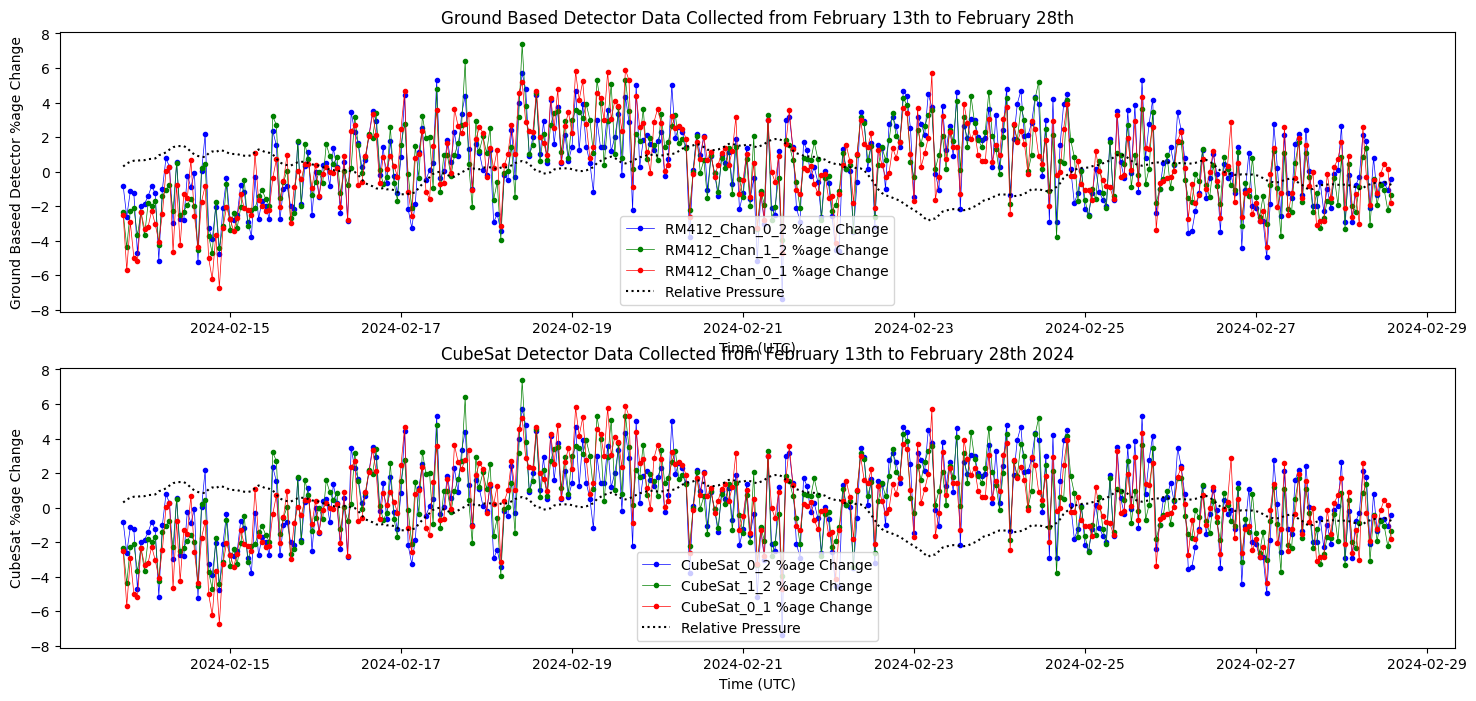

In [58]:
plt.rcParams["axes.grid"] = False
fig, (ax5, ax6) = plt.subplots(2,figsize=(18, 8))

ax5.plot(df_ground_updated["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='RM412_Chan_0_2 %age Change')
#ax5.plot(df_ground_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax5.plot(df_ground_updated["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='RM412_Chan_1_2 %age Change')
#ax5.plot(df_ground_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax5.plot(df_ground_updated["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='RM412_Chan_0_1 %age Change')
#ax5.plot(df_ground_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax5.plot(df_combined3.index, df_combined3['Relative_Pressure_pct'], color='black',linestyle='dotted', label='Relative Pressure')


ax5.set_ylabel('Ground Baseed Detector %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('Ground Based Detector Data Collected from February 13th to February 28th')
ax5.legend(loc='lower center')

ax6.plot(df_cubesat_updated["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='CubeSat_0_2 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax6.plot(df_cubesat_updated["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_cubesat_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax6.plot(df_cubesat_updated["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined3.index, df_combined3['Relative_Pressure_pct'], color='black',linestyle='dotted', label='Relative Pressure')

ax6.set_ylabel('CubeSat %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data Collected from February 13th to February 28th 2024')
ax6.legend(loc='lower center')

moving average plot

In [63]:
#drop the first 5 lines of data
df_combined3 = df_combined3.iloc[5:]
df_ground_updated = df_ground_updated.iloc[5:]
df_cubesat_updated = df_cubesat_updated.iloc[5:]

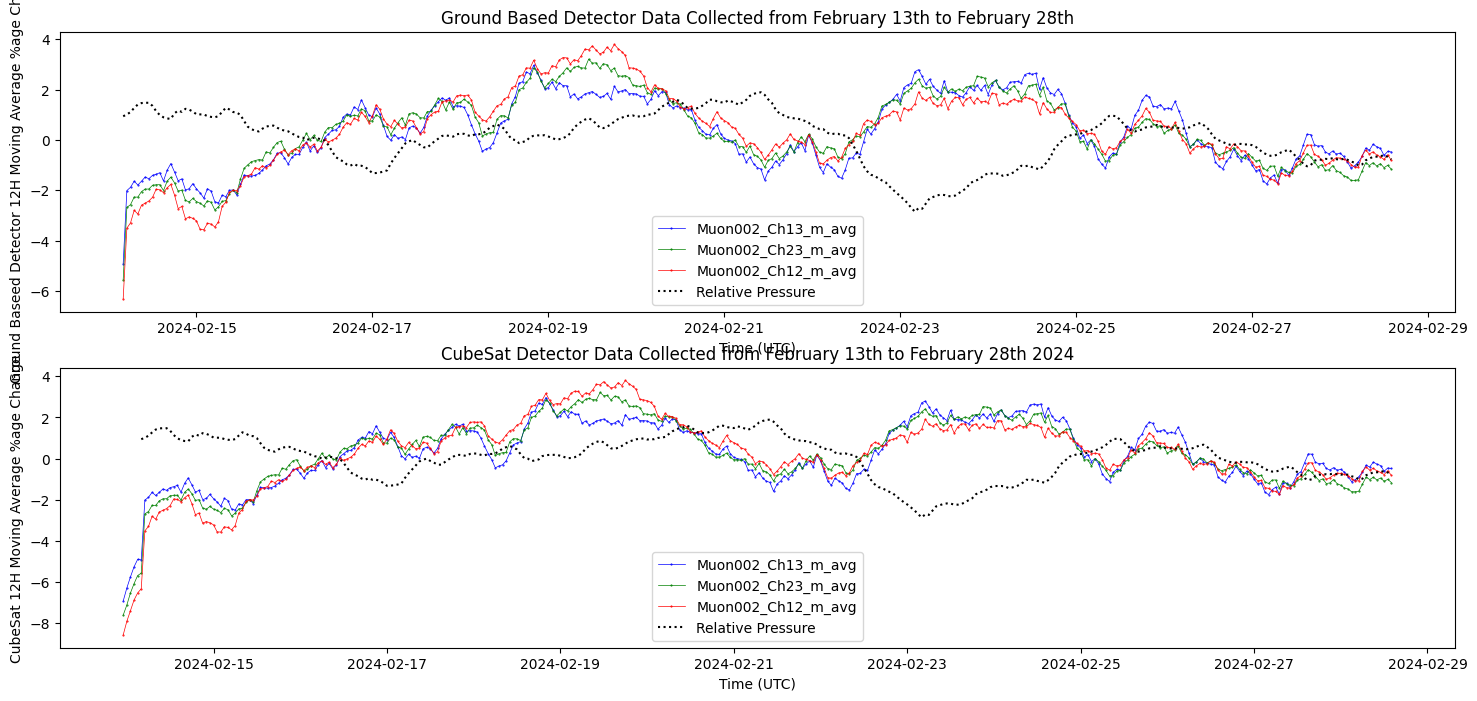

In [64]:
plt.rcParams["axes.grid"] = False
fig, (ax5, ax6) = plt.subplots(2,figsize=(18, 8))

#ax5.plot(df_ground_updated["Chan_0_2_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='RM412_Chan_0_2 %age Change')
ax5.plot(df_ground_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13_m_avg')
#ax5.plot(df_ground_updated["Chan_1_2_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='RM412_Chan_1_2 %age Change')
ax5.plot(df_ground_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23_m_avg')
#ax5.plot(df_ground_updated["Chan_0_1_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='RM412_Chan_0_1 %age Change')
ax5.plot(df_ground_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax5.plot(df_combined3.index, df_combined3['Relative_Pressure_pct'], color='black',linestyle='dotted', label='Relative Pressure')

ax5.set_ylabel('Ground Baseed Detector 12H Moving Average %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('Ground Based Detector Data Collected from February 13th to February 28th')
ax5.legend(loc='lower center')

#ax6.plot(df_cubesat_updated["Chan_0_2_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='CubeSat_0_2 %age Change')
ax6.plot(df_cubesat_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13_m_avg')
#ax6.plot(df_cubesat_updated["Chan_1_2_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
ax6.plot(df_cubesat_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23_m_avg')
#ax6.plot(df_cubesat_updated["Chan_0_1_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
ax6.plot(df_cubesat_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined3.index, df_combined3['Relative_Pressure_pct'], color='black',linestyle='dotted', label='Relative Pressure')

ax6.set_ylabel('CubeSat 12H Moving Average %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data Collected from February 13th to February 28th 2024')
ax6.legend(loc='lower center')